# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Data Loading

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the output of df.info(), we can see that this dataset consists of 200 rows and 5 columns. Here are the details of each column.

**CustomerID**: This contains a unique ID for each customer, with an int64 data type.

**Gender**: This shows the customer's gender, with an object (category) data type.

**Age**: This displays the customer's age in years, with an int64 data type.

**Annual Income (k$)**: This contains the customer's annual income in thousands of dollars, with an int64 data type.

**Spending Score (1-100)**: This shows the customer's spending score, ranging from 1 to 100, with an int64 data type.

All columns have non-null values, meaning there are no missing values ​​to handle.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Based on the descriptive statistics results displayed by df.describe(), we can see some important information about the numeric columns in the dataset.

CustomerID:

- This consists of 200 unique data with an average value of 100.5.

- Customer ID varies from 1 to 200.

Age

- Customer ages range from 18 to 70 years with an average of 38.85 years.

- Most customers are in the age range of 28.75 to 49 years (Q1 to Q3).

Annual Income (k$)

- Customer annual income varies between 15 to 137 thousand dollars with an average of 60.56 thousand dollars.

- Most customers have an annual income between 41.5 to 78 thousand dollars.

Spending Score (1–100)

- Customer spending scores range from 1 to 99 with an average spending score of 50.2.

- Most customers have a spending score between 34.75 and 73.

# EDA

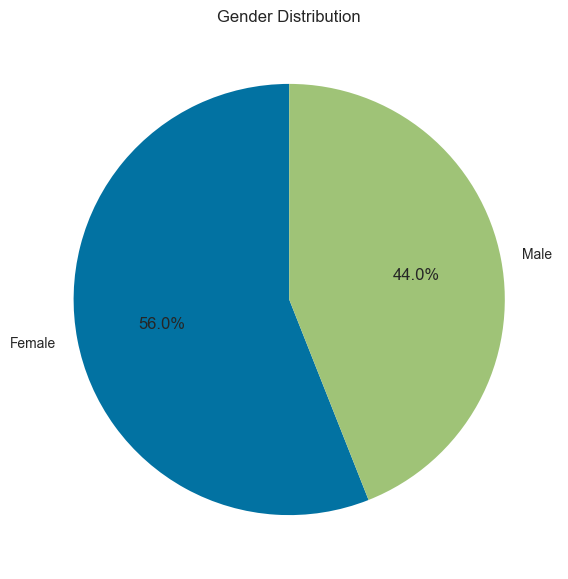

In [14]:
data_gender = df.Gender.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(data_gender, labels=data_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()